### DNN - 로지스틱의 한계 극복

## 1. Imports

In [2]:
import torch
import matplotlib.pyplot as plt
import pandas as pd

## 2. 꺾인 확률 그래프를 만들기

증가했다가 내려가는 벡터를 만들어보자

In [3]:
x = torch.linspace(-1, 1, 1001).reshape(-1, 1)
x

tensor([[-1.0000],
        [-0.9980],
        [-0.9960],
        ...,
        [ 0.9960],
        [ 0.9980],
        [ 1.0000]])

In [5]:
y = x*0 + x
y[x < 0] = (9*x+4.5)[x<0]
y[x >= 0] = (-4.5*x + 4.5)[x>=0]

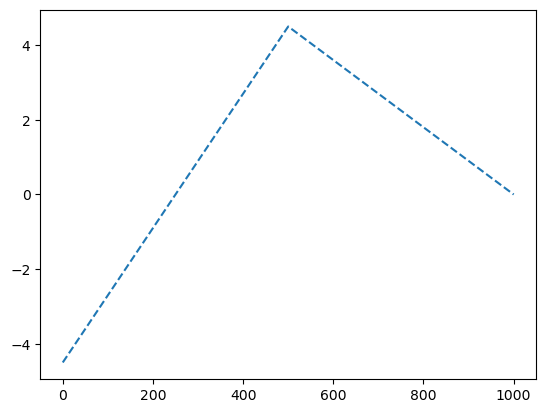

In [6]:
plt.plot(y, '--')

`relu`를 이용하는 방법

In [10]:
relu = torch.nn.ReLU()

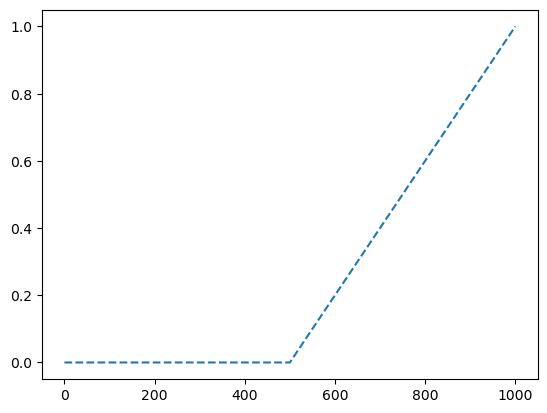

In [13]:
plt.plot(relu(x), '--')  ## 0보다 작은 것은 0이 된다.

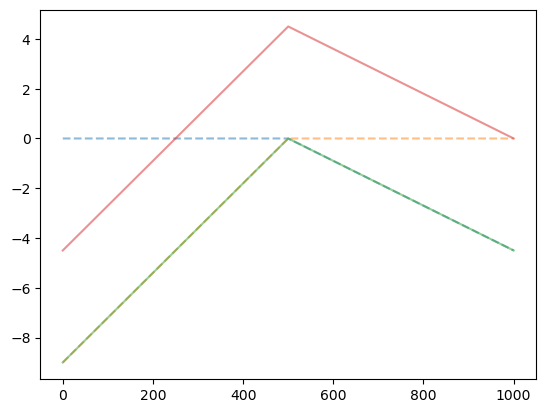

In [22]:
plt.plot(-4.5*relu(x), '--', alpha = 0.5)
plt.plot(-9*relu(-x), '--', alpha = 0.5)
## 두 개를 더하면 꺾인 선이 나온다.
plt.plot(-4.5*relu(x)-9*relu(-x), alpha = 0.5)
## 0 근처로 맞춰주자...
plt.plot(-4.5*relu(x)-9*relu(-x)+4.5, alpha = 0.5)
plt.show()

> 위 빨간 선을 시그모이드에 먹이면 우리가 원하는 모양의 함수가 된다.

In [23]:
sig = torch.nn.Sigmoid()

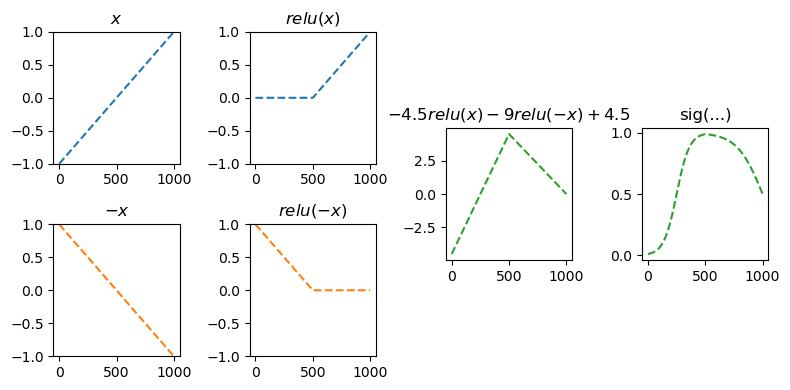

In [24]:
fig = plt.figure(figsize=(8, 4))
spec = fig.add_gridspec(4, 4)
ax1 = fig.add_subplot(spec[:2,0]); ax1.set_title(r'$x$'); ax1.set_ylim(-1,1)
ax2 = fig.add_subplot(spec[2:,0]); ax2.set_title(r'$-x$'); ax2.set_ylim(-1,1)
ax3 = fig.add_subplot(spec[:2,1]); ax3.set_title(r'$relu(x)$'); ax3.set_ylim(-1,1)
ax4 = fig.add_subplot(spec[2:,1]); ax4.set_title(r'$relu(-x)$'); ax4.set_ylim(-1,1)
ax5 = fig.add_subplot(spec[1:3,2]); ax5.set_title(r'$-4.5 relu(x)-9 relu(-x)+4.5$')
ax6 = fig.add_subplot(spec[1:3,3]); ax6.set_title('sig(...)');
#---#
ax1.plot(x,'--',color='C0')
ax2.plot(-x,'--',color='C1')
ax3.plot(relu(x),'--',color='C0')
ax4.plot(relu(-x),'--',color='C1')
ax5.plot(-4.5*relu(x)-9*relu(-x)+4.5,'--',color='C2')
ax6.plot(sig(-4.5*relu(x)-9*relu(-x)+4.5),'--',color='C2')
fig.tight_layout()

> $x$를 바로 시그모이드에 먹이는 것이 아닌 일종의 변환을 한 뒤에 시그모이드에 먹임으로써 원하는 확률 그래프 형태를 만들 수 있다.

### 단계별로 정리

1. 벡터 `x`와 `relu` 함수를 준비한다.
2. `u = [x, -x]`를 계산한다.
3. `v = [relu(x), relu(-x)]`를 계산한다.
4. `y = a*relu(x) + b*relu(-x) + c`를 계산한다.

In [26]:
## step 1
x = torch.linspace(-1, 1, 1001).reshape(-1, 1)
relu = torch.nn.ReLU()

## step 2
u = torch.concat([x, -x], axis = 1)

## step 3
v = relu(u)

## step 4
-4.5 * v[:, [0]] - 9.0 * v[:, [1]] + 4.5 ## axis = 1

tensor([[-4.5000],
        [-4.4820],
        [-4.4640],
        ...,
        [ 0.0180],
        [ 0.0090],
        [ 0.0000]])